In [1]:
import pandas as pd
import numpy as np 

In [6]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

DATA CLEANING 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
#drop unrequired columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#rename column names 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(3)

,target,text
2552,ham,"Oh fine, I'll be by tonight"
362,ham,Check audrey's status right now
3039,ham,One day a crab was running on the sea shore..T...


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 

In [17]:
df['target'] = encoder.fit_transform(df['target'])
# HAM-0; SPAM-1

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
df.duplicated().sum()

403

In [21]:
#remove duplicates and keep the first one 
df = df.drop_duplicates(keep='first')

In [23]:
df.shape

(5169, 2)

EDA 

In [24]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

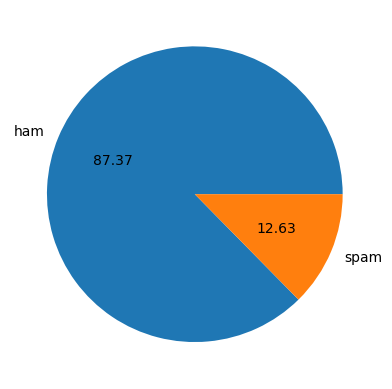

In [27]:
#plot a graph 
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kauna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [31]:
#to check the number of characters in text column 
df['num_characters']= df['text'].apply(len)

In [32]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
# to get the length for number of sentences in the text column  
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
# HAM Messages 
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [38]:
# SPAM Messages 
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [49]:
import seaborn as sns

In [41]:
pip install --upgrade seaborn


     -------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.8.1
    Uninstalling seaborn-0.8.1:
      Successfully uninstalled seaborn-0.8.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.5.1 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.2 which is incompatible.
klib 1.0.7 requires seaborn<0.13.0,>=0.11.2, but you have seaborn 0.13.2 which is incompatible.


In [46]:
pip install matplotlib --upgrade

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\kauna\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



     ---------------------------------------- 7.8/7.8 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 211.8/211.8 kB 6.5 MB/s eta 0:00:00
     --------------------------------------- 15.9/15.9 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0


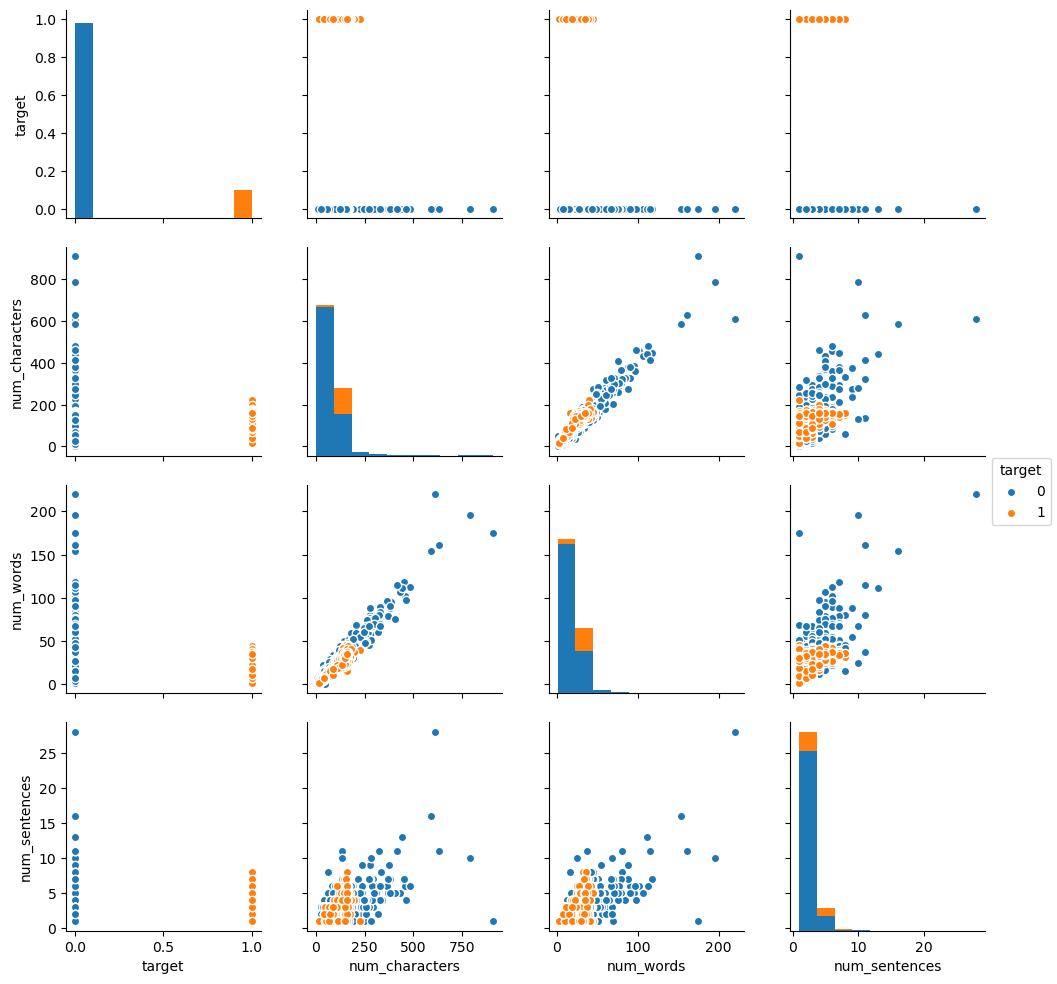

In [51]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

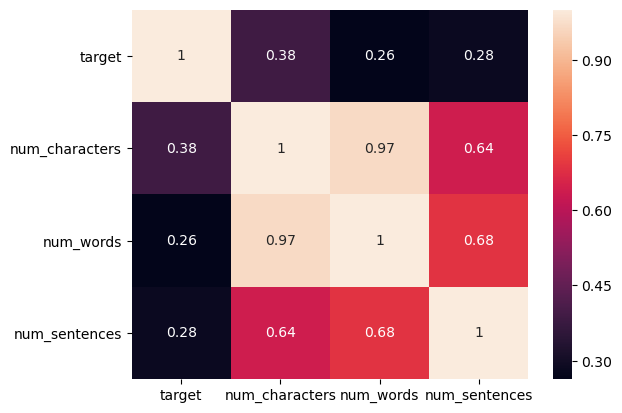

In [53]:
sns.heatmap(df.corr(),annot=True)

Data Pre-Processing 

In [56]:
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()


In [61]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kauna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kauna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [62]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string


ps = PorterStemmer()

def transform_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize text
    text = nltk.word_tokenize(text)
    
    y = []
    
    # Keep only alphanumeric tokens
    for i in text:
        if i.isalnum():  # Corrected here
            y.append(i)
            
    text = y[:] 
    y.clear()
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  # Corrected stopwords
            y.append(i)
            
    text = y[:] 
    y.clear()
    
    # Apply stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


In [63]:
transform_text("I loved the movie alot... I wish it has a part 2 to it!!")

'love movi alot wish part 2'

In [66]:
df['transformed_text'] = df['text'].apply(transform_text)

In [67]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [70]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

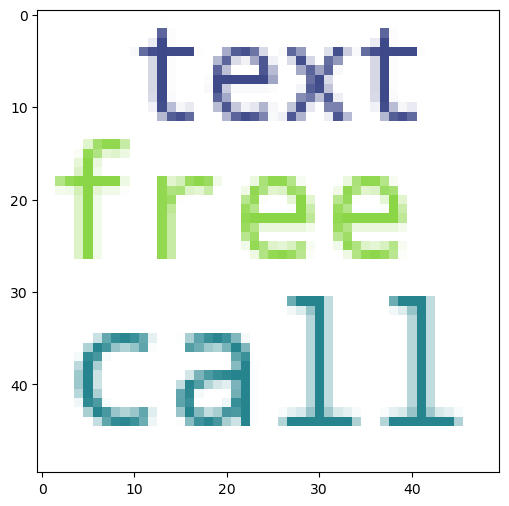

In [77]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [80]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=""))

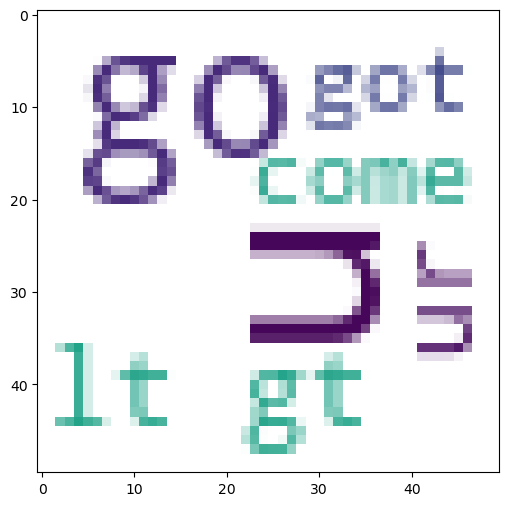

In [81]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [83]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [84]:
len(spam_corpus)

9939

In [85]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [86]:
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [87]:
len(ham_corpus)

35394

In [88]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

Model Building 

In [89]:
# using Naive Baye's algortihm 
# 1st let's convert transformed_text column to numeric type 

from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer()

In [90]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [91]:
X.shape

(5169, 6708)

In [93]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [102]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [98]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [103]:
# gnb performance on model
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [104]:
#mnb performance on model
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [105]:
#bnb performance on model
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
